KNN 으로 붓꽃 분류 하기
- UCI 데이터셋 다운로드
- pandas 로 읽기
- 입력(X:꽃잎과 받침이 길이 너비)과 출력(Y:품종) 분리
- 150 개의 인스턴스(샘플), 학습용(75%), 테스트용(25%) 분리
- 모델을 선정 -> K(K:3-5개 정도)NN
- 목표 : 테스트 샘플의 분류 정확도를 높이기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [2]:
df = pd.read_csv('iris.data', header=None) #None : 컬럼명 없을때
df.shape


(150, 5)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info() # 컬럼 타입, 숫자로 변환할지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


- 입력(X:꽃잎과 받침이 길이 너비)과 출력(Y:품종) 분리

In [5]:
X = df.iloc[:, :4]
y = df.iloc[:, :-1]
X.shape, y.shape # X는 2차원, y는 1차원,나중에 문제되면 이부분 확인필요

((150, 4), (150, 4))

150 개의 인스턴스(샘플), 학습용(75%), 테스트용(25%) 분리 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(5)
#knn.fit(X_train, y_train) 

In [10]:
#knn.predict(X_test) #예측하기

In [12]:
#knn.score(X_train, y_train), knn.score(X_test, y_test)

코스피 200이 거래 데이터, 종가 예측하기
- 샘플 : 하루의 총 일거래 정보

In [16]:
url='https://finance.daum.net/domestic/kospi200'
url='코스피200 _ 다음 금융.html'#웹페이지를 다른 이름으로 저장
tables = pd.read_html(url, index_col=0)
len(tables)

3

In [18]:

for table in tables:
    print(table.shape)

(10, 6)
(10, 8)
(10, 7)


In [38]:
df = tables[1]
tables[1]

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.88,0.39,-0.14,25220,937073,289,186,-455
19.07.01,277.27,0.23,-0.08,74357,3446049,-214,1286,365
19.06.28,277.50,0.25,-0.09,67598,2879563,-1802,3011,-1189
19.06.27,277.75,2.22,0.81,66303,3357666,-4165,1837,2415
19.06.26,275.53,0.25,0.09,58818,2636531,-712,157,557
19.06.25,275.28,0.30,-0.11,60506,2635188,-364,277,-12
19.06.24,275.58,0.10,0.04,55539,2235175,-978,-1048,1966
19.06.21,275.48,0.53,-0.19,77279,3275700,538,206,-767
19.06.20,276.01,0.70,0.25,55336,2417864,-1342,-434,1762


In [21]:
#전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)

In [22]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [47]:

# 입력X 와 출력Y 분리
# x_0, x_1, x_2(아래첨자)...
y = df['종가']
X = df.iloc[:, 1:]
X.shape, y.shape
y.head()

일자
19.07.02    276.88
19.07.01    277.27
19.06.28    277.50
19.06.27    277.75
19.06.26    275.53
Name: 종가, dtype: float64

In [24]:

offset = 2 #test 용 갯수
m_max = len(X)
X_train = X[offset:m_max]
X_test = X[0:offset]
y_train = y[offset:m_max]
y_test = y[0:offset]

In [25]:
from sklearn.neighbors import KNeighborsRegressor #Regressor 실수 예측용

In [49]:

knn = KNeighborsRegressor(n_neighbors=1) #클래스의 instance 생성 문법
knn.fit(X_train, y_train)
y_train

일자
19.06.28    277.50
19.06.27    277.75
19.06.26    275.53
19.06.25    275.28
19.06.24    275.58
19.06.21    275.48
19.06.20    276.01
19.06.19    275.31
Name: 종가, dtype: float64

In [27]:

knn.predict(X_test)

array([275.58, 277.75])

In [29]:
#71
knn.score(X_train, y_train) # trainset 에 k=1이므로 당연히 100%

1.0

In [30]:
#.score()의 리턴 2종류 : classfication 정확도, regression 결정계수
knn.score(X_test, y_test) # 이 모델은 신뢰 X

-24.251808021041175

KNN 장단점
- 장점 : 이해하기 매우 쉬운 모델, k를 많이 조정하지 않아도 좋은 성능, 좋은 시작점
- 단점 : 전처리가 중요하다(정규화 필요), 특성(컬럼)이 많으면 동작 X, 특성값이 대부분이 0이면(희소한, sparse) 
            -++--++X
- 이러한 단점을 해결한 선형 모델(linear model)

In [32]:
#p.74
import mglearn

w[0]: 0.393906  b: -0.031804


C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


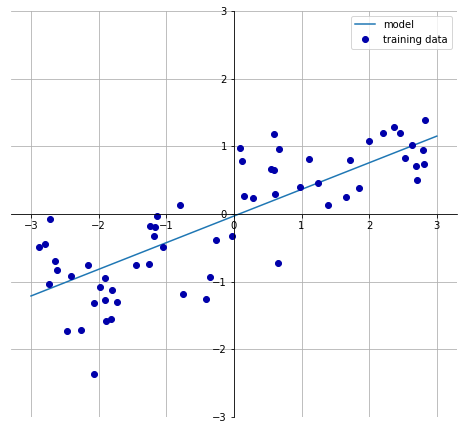

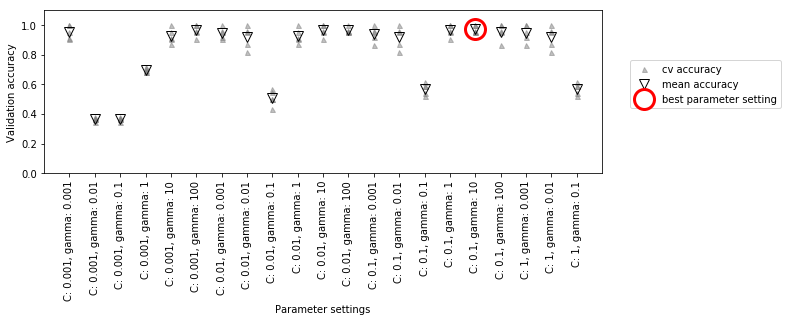

In [37]:
mglearn.plots.plot_linear_regression_wave()
mglearn.plots.plot_cross_val_selection()